In [92]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode #https://uszipcode.readthedocs.io/index.html
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
#create a variable for the searchengine function which pulls down all lat/longs in database
search = SearchEngine()

In [6]:
#read in crime data
df_crime = pd.read_csv('Crimes 2018.csv')
df_crime_latlon=df_crime.loc[:,['Latitude', 'Longitude']]
df_crime_latlon

,Latitude,Longitude
0,41.689079,-87.696064
1,41.763181,-87.657709
2,41.740521,-87.647391
3,41.857068,-87.657625
4,41.751914,-87.647717
5,41.875684,-87.760479
6,41.750154,-87.661009
7,41.939625,-87.673996
8,41.905562,-87.707589
9,41.940519,-87.654124


In [7]:
res = []
#for every row in df_crime_latlon
for index, row in df_crime_latlon.iterrows():
    #part of uszipcode library it takes the lat/lon from the row you are in and looks for the nearest zip (returns=1) 
    #in a 3 mile radius
    result = search.by_coordinates(row["Latitude"], row["Longitude"], radius=3, returns=1)
    #append to res
    res.append(result)

In [78]:
#double check that the length is the length in the csv file
len(res)

263455

In [18]:
#create a blank list for zipcodes
zipcodes= []
#for every entry returned in res
for i in range(len(res)):
    #this is a list of lists so for every entry there is another list inside that contains geographical information
    for x in res[i]:
        # zipcode is from uszipcode library and find the zipcode in the list
        zip = x.zipcode
     #   first = res[i]
        #append the zipcode to the zipcodes list
        zipcodes.append(zip)
#     zipcodes.append(first)
len(zipcodes)

263455

In [52]:
#create a dataframe of zipcodes
zip_df = pd.DataFrame({"Zipcode": zipcodes})
#count number of zip codes and reset index so zip code becomes a column
zipcode_count = zip_df["Zipcode"].value_counts().reset_index()
#rename the variables and output to csv
zipcode_count_rename = zipcode_count.rename(columns={"index": "Zipcode","Zipcode":"Crime Count"})
zipcode_count_rename.to_csv("Crime_Count by zip.csv", encoding="utf-8", index=False)
#make sure zipcode is numeric
zipcode_count_rename['Zipcode'] = pd.to_numeric(zipcode_count_rename['Zipcode'])

In [79]:
#read in census file with population
zipcode_pop_full_df = pd.read_csv('Census_Data/chicago_census_data.csv')
#zipcode_pop_full_df
#just grab zipcode and population
zipcode_pop_only_df= zipcode_pop_full_df.loc[:,['Zipcode', 'Population']]
#zipcode_pop_only_df=zipcode_pop_only_df.rename(columns={"Zip Code" :"Zipcode"})
#make sure zipcode and population is numeric
zipcode_pop_only_df['Zipcode'] = pd.to_numeric(zipcode_pop_only_df['Zipcode'])
zipcode_pop_only_df['Population'] = pd.to_numeric(zipcode_pop_only_df['Population'])

In [82]:
#merge crime data and zip/pop dataframes by zipcode
crime_pop=pd.merge(zipcode_count_rename, zipcode_pop_only_df, on = "Zipcode")
#divide crime count by population to get crime per capita
crime_pop['Crime Per 1000 People']=(crime_pop['Crime Count']/crime_pop['Population'])*1000
crime_pop.to_csv("Crime_per_Capita by zip.csv", encoding="utf-8", index=False)

In [88]:
#pull in housing_Data csv
housing_df=pd.read_csv("housing_data.csv")
#make sure zipcode is numeric
housing_df['Zipcode'] = pd.to_numeric(housing_df['Zipcode'])
housing_df.head()

,Zipcode,Median Rent,Median Home Value
0,60601,1944.0,391100.0
1,60602,1666.0,NaN
2,60603,1630.0,NaN
3,60604,1835.0,NaN
4,60605,1865.0,284100.0


In [90]:
crime_complete = pd.merge(crime_pop, housing_df, on='Zipcode' )
crime_complete.head()

,Zipcode,Crime Count,Population,Crime Per 1000 People,Median Rent,Median Home Value
0,60624,15082,37665,400.424798,1470.0,127100.0
1,60619,12993,62992,206.264288,1429.0,129900.0
2,60621,10138,30496,332.437041,1348.0,NaN
3,60620,9919,69195,143.348508,1424.0,125600.0
4,60628,8577,67942,126.240028,1391.0,NaN


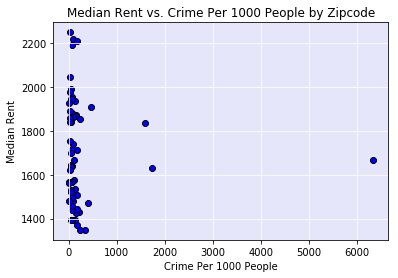

In [96]:
#plot rent vs crime
fig, ax1 = plt.subplots()
ax1.set_facecolor("lavender")
plt.scatter(crime_complete["Crime Per 1000 People"],crime_complete["Median Rent"], edgecolor="black", c="blue", marker='o')
plt.grid(color="white")
plt.title("Median Rent vs. Crime Per 1000 People by Zipcode")
plt.ylabel("Median Rent")
plt.xlabel("Crime Per 1000 People")
plt.savefig("Images/Rent_Vs_Crime.png", bbox_inches='tight')
plt.show()